In [2]:

# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

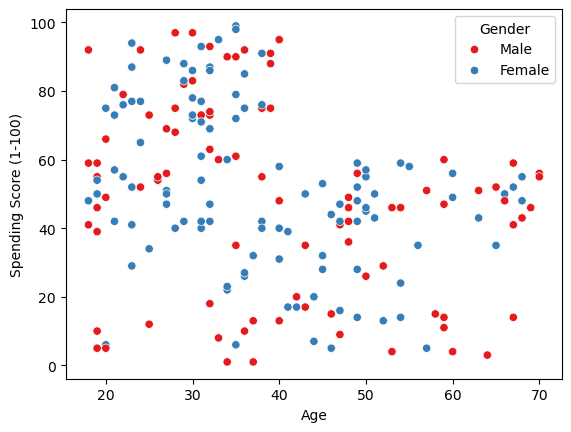

In [7]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',
                data=df, hue='Gender',
                palette='Set1', legend="full")
plt.show()


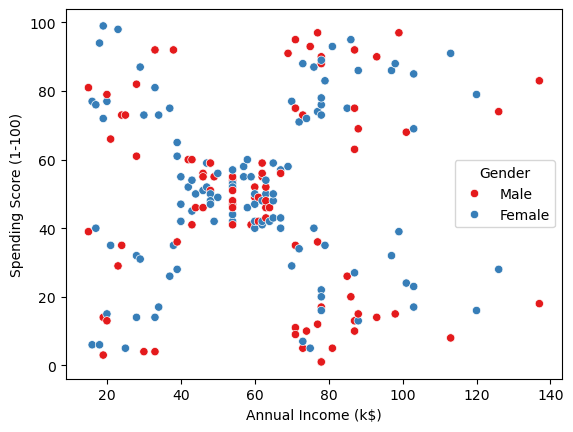

In [8]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
                data=df, hue='Gender',
                palette='Set1', legend="full")
plt.show()
plt.show()

In [9]:
X_num = df[['Age','Annual Income (k$)','Spending Score (1-100)' ]]
X_num.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [10]:
!pip install yellowbrick

In [11]:
#import k means
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

  File "c:\Users\gandh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\gandh\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gandh\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gandh\anaconda3\Lib\subprocess.

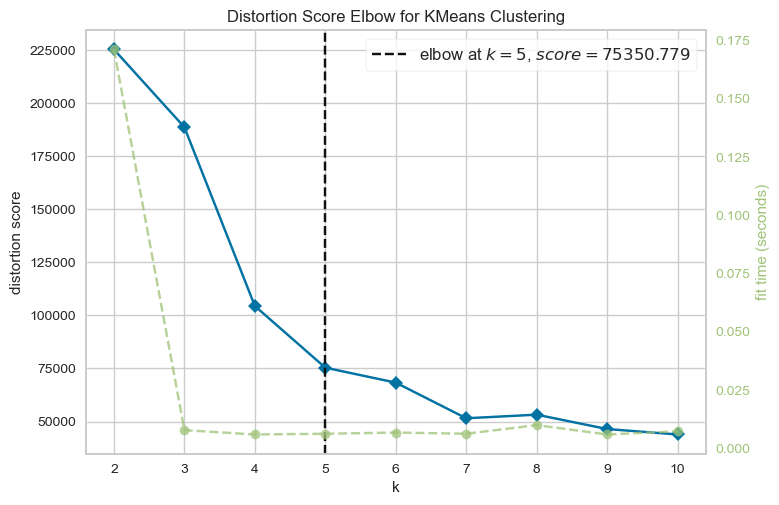

In [12]:
#visualize
model = KMeans(random_state=1)
visualizer  = KElbowVisualizer(model,K=(2,10))
visualizer.fit(X_num)
visualizer.show()
plt.show()

In [13]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_num) # initialise and fit K-Means model

KM5_clustered = X_num.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

In [14]:
KM5_clustered.head()

Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        0
1   21                  15                      81        0
2   20                  16                       6        2
3   23                  16                      77        0
4   31                  17                      40        2

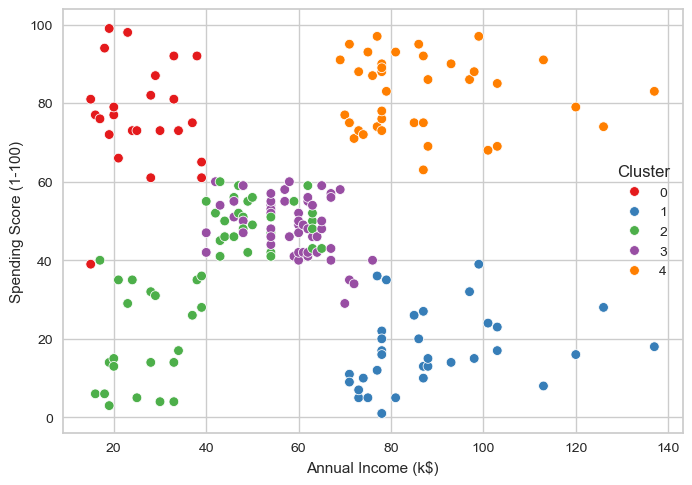

In [15]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data = KM5_clustered,
                hue='Cluster',
                palette='Set1',
                legend ='full')
plt.show()